In [1]:
#Reading the CSV file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

acc_stats_df = pd.read_csv('acc_players-2324F.csv', sep=',', encoding='latin1')
acc_stats_df.columns = acc_stats_df.iloc[0]
acc_stats_df  = acc_stats_df[1:]
acc_stats_df['MP'] = pd.to_numeric(acc_stats_df['MP'], errors='coerce')
acc_stats_df['FG%'] = pd.to_numeric(acc_stats_df['FG%'], errors='coerce')
acc_stats_df['WS'] = pd.to_numeric(acc_stats_df['WS'], errors='coerce')
acc_stats_df['PTS'] = pd.to_numeric(acc_stats_df['PTS'], errors='coerce')
acc_stats_df.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.5,NaN,NaN,3.5,0.0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0.0,-8.2
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [2]:
#Basic Analysis
#Calculate the total points scored by all players combined.
total_points = acc_stats_df['PTS'].sum()
total_points

38411

In [3]:
#Find the player who has played the most minutes (MP).
player_most_min = acc_stats_df[['Player','MP']].sort_values(by='MP', ascending=False).head(1)
player_most_min

,Player,MP
136,Casey Morsell,1333


In [4]:
#Identify the top 5 players in terms of total rebounds (TRB).
top_five_rebounders = acc_stats_df[['Player','TRB']].sort_values(by='TRB', ascending=False).head(5)
top_five_rebounders

,Player,TRB
125,Isaac McKneely,99
131,Kevin Miller,98
68,Darin Green Jr.,97
70,Jacob Groves,96
161,Tyrese Proctor,96


In [5]:
#Player filtering
#Create a new DataFrame containing only players who played more than 500 minutes.

players_500_minutes = acc_stats_df[acc_stats_df['MP'] > 500]
players_500_minutes 

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9
6,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.540,0.544,0.4,0.781,24.6,6.1,8.9
8,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,...,70,43,486,0.443,0.487,0.31,0.754,23.4,4.9,10.5
10,10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,...,26,58,384,0.434,0.459,0.42,0.842,14.9,2.2,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,Jamir Watkins,JR,F,Florida State,33,928,199,91,64,...,84,92,514,0.457,0.5,0.344,0.795,24.2,3.9,9.1
207,207,Tre White,SO,G,Louisville,29,907,170,39,24,...,53,66,357,0.456,0.515,0.299,0.752,15,1.7,1.8
208,208,Chauncey Wiggins,SO,F,Clemson,36,639,76,33,6,...,26,46,196,0.442,0.528,0.349,0.714,11,1.2,1.9
210,210,Curtis Williams,FR,G,Louisville,32,564,42,20,12,...,26,24,170,0.317,0.373,0.287,0.714,5.9,-0.2,-3.8


In [6]:
#From this filtered DataFrame, determine the player with the highest total assists (AST).
highest_total_assists = players_500_minutes[['Player','AST']].sort_values(by='AST', ascending=False).head(1)
highest_total_assists

,Player,AST
202,Jalen Warley,92


In [7]:
#Who are the top 3 Assist Leads in the League?
top_three_total_assists = players_500_minutes[['Player','AST']].sort_values(by='AST', ascending=False).head(3)
top_three_total_assists

,Player,AST
202,Jalen Warley,92
204,Jamir Watkins,91
190,Kyle Sturdivant,91


In [8]:
#Who are the top 3 Shot Blockers
top_three_blockers = players_500_minutes[['Player','BLK']].sort_values(by='BLK', ascending=False).head(3)
top_three_blockers

,Player,BLK
157,Wooga Poplar,9
116,Mason Madsen,8
96,Ty-Laur Johnson,8


In [9]:
#School-Based Analysis
#Group the players by School and calculate the total points scored by each school.
points_by_school = acc_stats_df.groupby('School')['PTS'].sum().sort_values(ascending=False).reset_index()
points_by_school

,School,PTS
0,NC State,3101
1,North Carolina,3032
2,Duke,2830
3,Clemson,2785
4,Wake Forest,2733
5,Boston College,2667
6,Virginia Tech,2547
7,Florida State,2526
8,Pittsburgh,2495
9,Syracuse,2442


In [10]:
#Group the players by School and calculate the total assists (AST) for each team.
assists_by_school = acc_stats_df.groupby('School')['AST'].sum().sort_values(ascending=False).reset_index()
assists_by_school

,School,AST
0,Louisville,870733471095031413920
1,Miami (FL),804876711003388961518
2,North Carolina,561501291380000443272113
3,Virginia Tech,3826487361844148243300218
4,Pittsburgh,2913636123326076110930
5,Clemson,2635105285171164600608033
6,Syracuse,2159108915111420603122
7,Virginia,21215122662133154929901
8,Boston College,2100117204350459310003152
9,Florida State,1801673321263300467015109291


In [11]:
#Sort the schools by total points scored and display the top 3 schools
top_three_points_by_school = points_by_school.head(3)
top_three_points_by_school

,School,PTS
0,NC State,3101
1,North Carolina,3032
2,Duke,2830


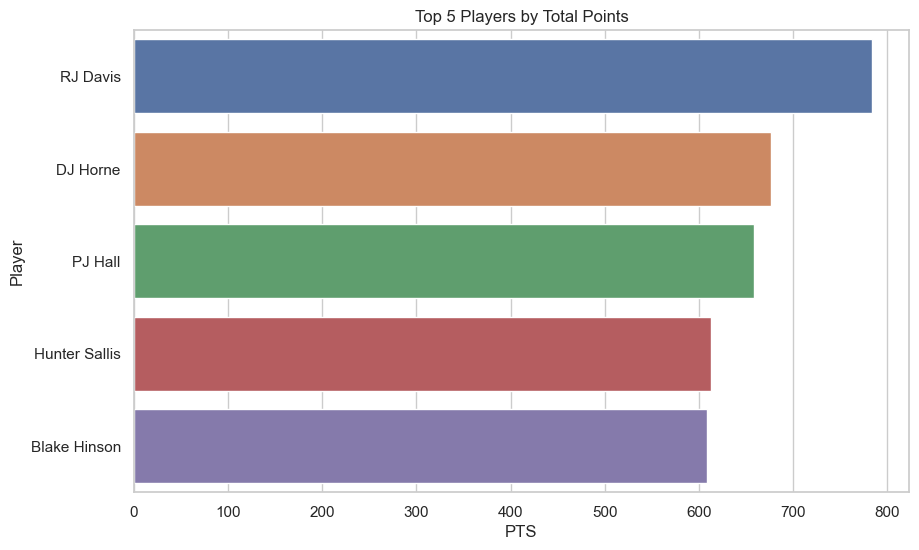

In [12]:
#Extra Credit (Bonus)
#Create a bar chart showing the top 5 players by total points scored (PTS).

top_5_points = acc_stats_df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x='PTS', y='Player', data=top_5_points)
plt.title('Top 5 Players by Total Points')
plt.show()

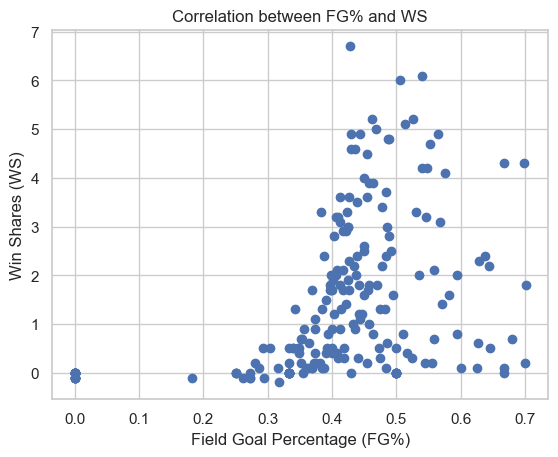

Correlation coefficient between FG% and WS: 0.4210663894199782


In [13]:
#Correlation: Investigate whether there is any correlation between a player's field goal 
#percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the correlation
#coefficient.

plt.scatter(acc_stats_df['FG%'], acc_stats_df['WS'])
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.title('Correlation between FG% and WS')
plt.show()

correlation = acc_stats_df[['FG%', 'WS']].corr().iloc[0, 1]
print(f"Correlation coefficient between FG% and WS: {correlation}")